In [5]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import pytorch_lightning as pl
from pytorch_lightning import Trainer
from pytorch_lightning.loggers import TensorBoardLogger
import torch.nn.functional as F
import sys
import os
from pytorch_lightning.callbacks.early_stopping import EarlyStopping
from sklearn.preprocessing import StandardScaler
root = "/project/wyin/jlee/ml-project/dos-prediction"
util_loc = os.path.join(root, "utils")
data_loc = os.path.join(root, "data")
sys.path.append(util_loc)
from utilities import LitNeuralNet, DosDataModule
print(os.getcwd())

/project/wyin/jlee/ml-project/dos-prediction/neural-nets/evaluation


In [20]:
check_dir = os.path.join(root, "neural-nets/ensembling/logs/long-run-24/",
"[3, 170, 340, 510, 680, 850, 1020, 301],0.001,1024,0.5/version_0/checkpoints")
check_path = os.path.join(check_dir, os.listdir(check_dir)[0])

model = LitNeuralNet.load_from_checkpoint(checkpoint_path=check_path)

In [42]:
def plot_dos(ax, t1, t2, j):
    dataset = np.load(f"{data_loc}/train-set.npz")
    train_params = dataset['params']
    scaler = StandardScaler()
    scaler.fit(train_params)
    
    params = np.array([[t1, t2, j]])
    params = scaler.transform(params)
    params = torch.from_numpy(params).float()
    
    predicted = best_model.forward_prop(params).detach().numpy()
    ax.plot(np.linspace(-6, 6, 301), predicted[0])

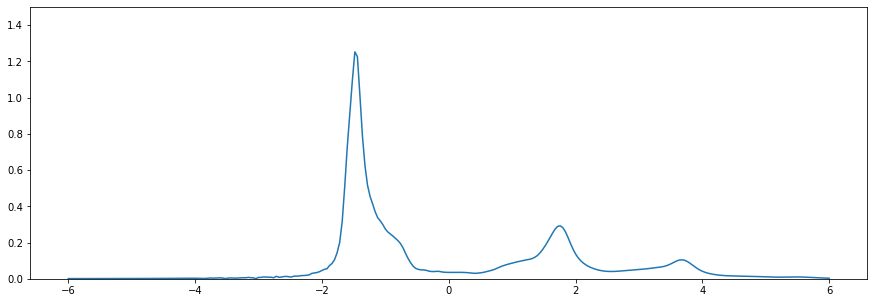

In [54]:
fig, ax = plt.subplots(figsize = (15, 5))
ax.set_ylim([0, 1.5])
plot_dos(ax, -0.01, 0.01, 1.00)